# "Analisis Sentiment Masyarakat Terhadap Berita Timothy Ronald Dilaporkan Kepada Pihak Berwajib"

## A. Business Understanding

### 1. Latar Belakang
Perkembangan media sosial di era digital telah membuka ruang kebebasan berpendapat yang masif. Namun, kebebasan ini sering kali menjadi pedang bermata dua, di mana kritik sering kali bercampur dengan ujaran kebencian (*hate speech*). Fenomena ini terlihat jelas pada kasus pelaporan **Timothy Ronald**, seorang influencer *Crypto*, yang memicu polarisasi opini publik yang ekstrem di kolom komentar.

Namun, tantangan utama muncul dari sisi volume data. Ribuan komentar yang masuk setiap harinya menciptakan tumpukan informasi tak terstruktur (*unstructured data*) yang mustahil dianalisis secara manual. Pemrosesan manual tidak hanya memakan waktu (*time-consuming*), tetapi juga rentan terhadap bias subjektif manusia, sehingga sulit untuk mendapatkan gambaran objektif mengenai sentimen masyarakat yang sebenarnya.

Oleh karena itu, penerapan teknologi **Natural Language Processing (NLP)** menjadi solusi krusial. Melalui algoritma *Machine Learning*, kita dapat membangun sistem yang mampu mengklasifikasikan sentimen secara otomatis. Hal ini tidak hanya meningkatkan efisiensi analisis, tetapi juga membantu memisahkan opini publik yang valid dari sekadar ujaran kebencian.

---

### 2. Problem Statement
Berdasarkan latar belakang di atas, terdapat tiga masalah utama yang diidentifikasi:

* **Inefisiensi Pemrosesan Manual (*Operational Inefficiency*)** Lonjakan interaksi pada kolom komentar menghasilkan ribuan data teks dalam waktu singkat. Pemrosesan data secara manual tidak memiliki skalabilitas (*scalability*), sehingga membutuhkan sumber daya manusia dan waktu yang tidak proporsional untuk mendapatkan hasil analisis yang menyeluruh.

* **Bias Subjektivitas Manusia (*Subjective Bias*)** Isu yang melibatkan figur publik sering kali memicu polarisasi emosional yang kuat. Analisis manual rentan terhadap *cognitive bias* pengamat, di mana penilaian sentimen (Positif/Negatif) dapat terdistorsi oleh preferensi pribadi, menghasilkan kesimpulan yang tidak objektif.

* **Kompleksitas Data Tidak Terstruktur (*Unstructured Data Complexity*)** Mayoritas komentar ditulis menggunakan ragam bahasa non-baku, penuh dengan singkatan (*slang*), kesalahan ketik (*typo*), dan campuran kode (*code-mixing*). Tanpa tahap *preprocessing* dan *feature extraction* yang tepat, data mentah ini sulit diklasifikasikan dengan akurat oleh metode statistik konvensional.

---

### 3. Tujuan Penelitian
Penelitian ini bertujuan untuk menjawab permasalahan di atas melalui langkah-langkah berikut:

1.  **Implementasi Preprocessing Data Tidak Terstruktur** Menerapkan tahapan *text preprocessing* yang komprehensif (meliputi *cleansing*, *tokenization*, *stopword removal*, dan penanganan *slang*) untuk mengubah data komentar mentah yang penuh *noise* menjadi data terstruktur yang siap diolah oleh mesin.

2.  **Pengembangan Model Tanpa Library Black-Box** Membangun dan mengimplementasikan algoritma **Multinomial Naive Bayes** secara manual (*from scratch*) menggunakan bahasa pemrograman Python. Tujuannya adalah untuk memahami logika matematis dan probabilitas di balik algoritma tersebut tanpa ketergantungan pada *library* instan seperti Scikit-Learn.

3.  **Evaluasi Performa Model** Mengukur tingkat efektivitas model klasifikasi yang telah dibangun menggunakan metrik evaluasi standar (seperti *Accuracy*), guna mengetahui seberapa andal algoritma buatan sendiri dalam memprediksi sentimen masyarakat terhadap kasus Timothy Ronald.

## B. Understanding dan Cleaning

## B.1 Import Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Library For NLP
import re
import nltk

from nltk.tokenize import word_tokenize # toneisasi
from nltk.corpus import stopwords

try:
 nltk.data.find('tokenizers/punkt')
except LookupError:
 print("Sedang Downaload NLTK")
 nltk.download('punkt')
 nltk.download('stopwords')
 print("Download Selesai")

### B.2 Read Data dan lihat 5 data terats 

In [3]:
try:
 df = pd.read_csv('Timothy.csv')
 print("Berhasil Membaaca Data")
except Exception as e:
 print("Gagal Membaca Data")

Berhasil Membaaca Data


### B.3 Melihat Informasi Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     5137 non-null   object
 1   Comment  5137 non-null   object
dtypes: object(2)
memory usage: 80.4+ KB


### B.4 Cek Dimensi Data

In [5]:
df.shape

(5137, 2)

### B.5 Cek Data Yang Hilang

In [6]:
msissing = df.isnull().sum()
msissing = msissing[msissing > 0]

In [7]:
msissing

Series([], dtype: int64)

In [8]:
df.isnull().sum()

User       0
Comment    0
dtype: int64

In [9]:
missing_val = df.isnull().mean() * 100
missing_val = missing_val[missing_val > 0].sort_values()

if not missing_val.empty:
 plt.figure(figsize=(10, 8))
 ax = missing_val.plot(kind='barh', color = 'tomato', zorder = 2)

 plt.title("Data Quality Check: Adakah Columns Missing Yang Melebihi Threshold?", fontsize = 14, fontweight = "bold", loc = 'left')
 plt.xlabel("Presentase Data Hilang (%)")
 plt.axvline(x = 50, color = 'black', linestyle = '--', alpha = 0.5)
 plt.text(52, 0, 'Batas Toleransi Kehilangan (50%)', color = 'black', va = 'center')
 plt.grid(axis = 'x', linestyle = '--', alpha = 0.3)

 plt.show()
else:
 print("Datanya Udah bener2 bersih")

Datanya Udah bener2 bersih


### B.6 Cek Duplikasi Data

In [17]:
df['User'].duplicated().sum()

np.int64(359)

In [18]:
df['Comment'].duplicated().sum()

np.int64(55)

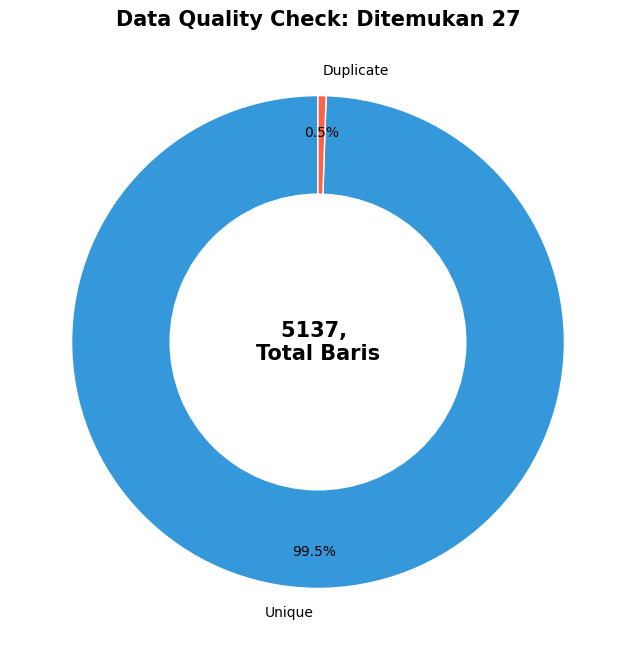

In [ ]:
n_dup = df.duplicated().sum()
sizes = [len(df) - n_dup, n_dup]

plt.figure(figsize = (10, 8))
color = ['#3498db', 'tomato']

plt.pie(sizes, labels=['Unique', 'Duplicate'], colors = color, autopct='%1.1f%%',
        startangle = 90, pctdistance = 0.85, wedgeprops={'width': 0.4, 'edgecolor': 'white'})
AC
plt.text(0, 0, f"{len(df):}, \nTotal Baris", ha = 'center', va = 'center', fontsize = 15, fontweight = 'bold')
plt.title(f"Data Quality Check: Ditemukan {n_dup}", fontsize  = 15, fontweight = 'bold')

plt.show()

### B.7 Overview Data 

In [ ]:
def check_data_health(df):
    # Kita bikin list kosong buat nampung laporan
    data_report = []
    
    # Loop ke setiap kolom 
    for col in df.columns:
        # 1. Hitung Missing Values
        missing = df[col].isnull().sum()
        missing_pct = (missing / len(df)) * 100
        
        # 2. Hitung Duplikat
        # 
        duplicates = df[col].duplicated().sum()
        
        # 3. Hitung Data Unik 
        unique = df[col].nunique()
        
        # Masukin ke laporan
        data_report.append([col, missing, f"{missing_pct:.1f}%", duplicates, unique])
    
    # Bikin jadi DataFrame
    report_df = pd.DataFrame(data_report, columns=['Column', 'Missing', 'Missing (%)', 'Duplicates (in Col)', 'Unique Values'])
    
    return report_df

#check
laporan = check_data_health(df)
print(laporan)

    Column  Missing Missing (%)  Duplicates (in Col)  Unique Values
0     User        0        0.0%                  359           4778
1  Comment        0        0.0%                   55           5082


## C. Data Preparation

### C.1 Handling Duplicates

In [23]:
# cek data awal
print(f"Jumlah Data Awal {len(df)}")

# drop duplicates
df.drop_duplicates(subset=['User', 'Comment'], keep = 'first', inplace=True)

# reset index agar rapih
df.reset_index(drop=True, inplace=True)

print(f"Junlah Data setelah Di drop duplicates: {len(df)}")

Jumlah Data Awal 5137
Junlah Data setelah Di drop duplicates: 5110


### C.2 Check Distribution Data

In [ ]:
# gabungin semua komentar
all_text = ' '.join(df['Comment'].astype(str))
tokens = word_tokenize(all_text.lower())

# buat dictionary kosong
word_freq = []

# looping
for word in tokens:
 if word in word_freq:
  word_freq[word] += 1
 else:
  word_freq[word] = 1

# sorting 
sorted_freq  = sorted(word_freq.items(), key = lambda item: item[1], reverse = True)

# Ambil 20 Kata Teratas
top_wors = sorted_freq[:20]

# pisahkan angka plotting
words = [item[0] for item in top_wors]
counts = [item[1] for item in top_wors]

# plotting
plt.figure(figsize=(10, 8))
sns.barplot(x = words, y = counts, palette= 'viridis')

# judul
plt.title('Diagnostic: Dominasi "Noise dan Slang Words pada Data Mentah', 
          fontsizes = 16, fontweight = 'bold', pad = 20)

plt.xlabel("Kata yang Sering Muncul", fontsize = 12)
plt.ylabel("Kata yang Sering Muncul", fontsize = 12)

plt.text(x = 10, y = max(counts)*0.8, 
         s ='Insight:\mBanyak Kata Sambung (Stop Words) dan Slang (Kata Gaul) yang harus dibersihkan',
         fontsize =11, bbox = dict(facecolor = 'white', alpha = 0.8, edgecolor = 'red'))

### C.2 Text Processing

09